Часть I: О теореме Байеса

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Решение 1:

Прокурор рассуждал так: 

P(имеет редкую группу крови  |  невиновен) = 0.01 и P(виновен | имеет редкую группу крови) = 1 - P(имеет редкую группу крови |  невиновен) => P(виновен | имеет редкую группу крови) = 0.99

Это рассуждение неверное т.к. это непротивоположные события

Он мог оценить:

P(невиновен | имеет редку группу крови). Также можно было изучить другие улики.

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


Решение 2:

Адвокат рассуждал так:

P(подсудимый убийца) = (количество убийц) / ( количество людей с редкой кровью) = 1 / 10000.

Он также мог вычислить:

P(невиновен | имеет редку группу крови).

Также можно было учесть другие улики, алиби и тд

3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?



In [ ]:
def false_positive():
    return 0

def false_negative():
    return 0

Часть II: О линейной регрессии

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [53]:
import pandas as pd

data = pd.read_csv('owid-covid-data.csv')
russia_data = data[(data['location'] == 'Russia') & (data['date'] >= '2020-03-03')]
russia_data['new_cases']=russia_data['new_cases'].replace(0,1)
russia_data.reset_index(inplace=True)
russia_data.drop('index', 1, inplace=True)
russia_data.reset_index(inplace=True)
russia_data_train = russia_data[:50]
russia_data_test = russia_data[50:]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

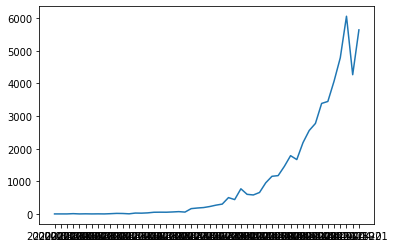

In [54]:
import matplotlib.pyplot as plt
plt.plot(russia_data_train['date'], russia_data_train['new_cases'])
plt.show()

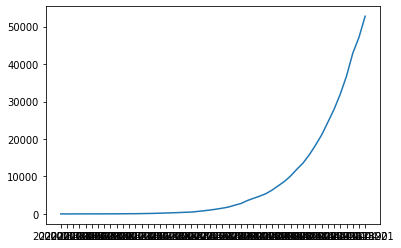

In [55]:
import matplotlib.pyplot as plt
plt.plot(russia_data_train['date'], russia_data_train['total_cases'])
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array(russia_data_train['index']).reshape(-1, 1)
Y = np.array(russia_data_train['total_cases']) 

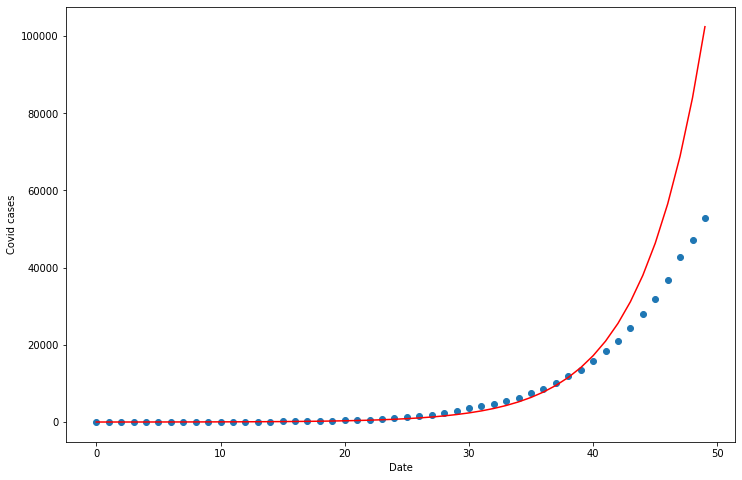

In [68]:
import math
model = LinearRegression().fit(X, np.log(Y))

a = model.intercept_
b = model.coef_
y_pred = (math.exp(a) * np.exp(b * X)).flatten()

plt.figure(figsize=(12, 8))
plt.scatter(X, Y)
plt.plot(X, y_pred, 'r')
plt.xlabel('Date')
plt.ylabel('Covid cases')
plt.show()